In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class wave:
  """
  Clase que contiene los algoritmos para resolver la ecuación de Helmoltz
  a partir de los parámetros
  """
  def __init__(self, min, max, size, y0):
    """
    Parámetros de la onda para obtener su solucion
    Definición de variables
    Dominio de la funcion (0,\infty)
    min  ----> valor minimo de los valores de r 
    max  ----> valor máximo de los valores de r
    size ----> numero de celdas a lo largo y ancho para 
               generae una matriz de sizeXsize
    y0   ----> Valores iniciales de la posicion y la velocidad respectivamente
    """
    self.min = min
    self.max = max
    self.size = size
    self.y0 = y0
    self.initialize_system()

  def initialize_system(self):
    """
    A partir de los valores maximos y minimos genera una
    serie de valores para la variable r y genera un mapa con los valores
    en cada celda
    """
    self.r = np.sqrt(2)*np.linspace(self.min, self.max, self.size)
    self.map = np.zeros((2*self.size, 2*self.size))

  def solve_PDE(self, df):
    """
    Funcion que resuelve la ecuación diferencial y asigna a cada valor
    de la celda su correspondiente solución
    """
    sol = odeint(df, self.y0, self.r)
    self.solution = sol[:, 0]
    self.fill_map()

  def fill_map(self):
    """
    Algoritmo para asignar el valor de la solucion en sus celdas correspondientes
    haciendo uso de la simetria radial, como princpical cuadrante de llenado es 
    I, los demás cuadrantes se les asigna su valor por medio de simetrias
    """
    for i in range(self.size):
        pos_i = self.pos_values(i)
        for j in range(self.size):
            pos_j = self.pos_values(j)
            self.fill_pos(pos_i, pos_j, i, j)

  def pos_values(self, pos):
    """
    Valores donde se encuentran las simetrias 
    """
    return [self.size-pos, self.size+pos]

  def fill_pos(self, pos_i, pos_j, i, j):
    """
    Funcion para asignar el valor a cada mapa haciedno uso de la simetria 
    """
    for ii in pos_i:
        for jj in pos_j:
            r_ij = (self.r[i]**2+self.r[j]**2)**(1/2)
            self.map[ii, jj] = self.fill_values(r_ij)

  def fill_values(self, r_ij):
    """
    Algoritmo para encontrar que valor le corresponde a cada celda
    """
    istrue = True
    n = 0
    value = 0
    while istrue and n < self.size:
        if r_ij-self.r[n] <= 0.001:
            value = self.solution[n]
            istrue = False
        else:
            n += 1
    return value

  def plot_graphics(self):
    """
    Funcion para graficar la funcion radial y creacion del mapa de colores
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax2.axis("off")
    contour = ax2.contourf(self.map, cmap="inferno_r")
    ax1.plot(self.r, self.solution)
    fig.colorbar(contour)
    plt.show()

In [3]:
def df(y, x, k=0.2, v=0.1):
  """
  Ecuación de Helmholtz
  """
  y1, y2 = y[0], y[1]
  dy1 = y2
  if 30 < x < 40:
      dy2 = 10
  else:
      dy2 = -y2/x-k*y1-v*y2
  return [dy1, dy2]

In [4]:
parameters = {
    "size": 100,
    "y0": [0, 1],
    "minimum": 0.01,
    "maximum": 100, }

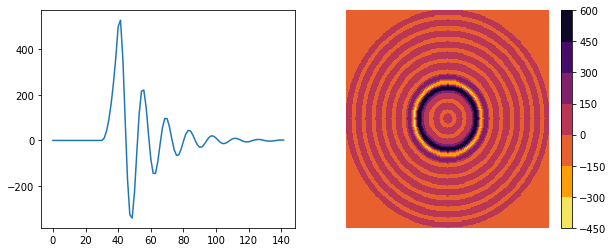

In [5]:
# Inicialización del sistema
wave_solution = wave(parameters["minimum"],
                     parameters["maximum"],
                     parameters["size"],
                     parameters["y0"])
# Resuelve la ecuación diferencial con los parámetros asignados
wave_solution.solve_PDE(df)
# Grafica de la solución
wave_solution.plot_graphics()